<a href="https://colab.research.google.com/github/OmriMan/Bagging/blob/main/Assignment2_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Packages

In [185]:
import numpy as np  # linear algebra
import pandas as pd  # data processing

from sklearn.tree import DecisionTreeClassifier  # model

from matplotlib import pyplot as plt  # visualization
from sklearn.tree import plot_tree  # visualize tree

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

import random

from sklearn.model_selection import RandomizedSearchCV

from tabulate import tabulate

#Dataset Stroke Prediction#
source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Classify / predict whether a patient can suffer a stroke.

Dataset Attributes :

id : unique identifier

gender : "Male", "Female" or "Other"

age : age of the patient

hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

heart_disease : 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

ever_married : "No" or "Yes"

work_type : "children", "Govt_job", "Never_worked", "Private" or "Self-employed"

Residence_type : "Rural" or "Urban"

avg_glucose_level : average glucose level in blood

bmi : body mass index

smoking_status : "formerly smoked", "never smoked", "smokes" or "Unknown"*

stroke : 1 if the patient had a stroke or 0 if not

The data contains 5110 observations with 12 attributes.

source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [186]:
def preprocess(df):
    # Gender
    change = { 'Other': 2,'Female':1,'Male':0}
    df.gender = df.gender.map(change)

    # BMI
    df['bmi'] = df['bmi'].replace(to_replace = np.nan, value =df['bmi'].mean())

    # ever_married
    change = {'No':0,'Yes':1}
    df.ever_married = df.ever_married.map(change)

    # Residence_type	
    change = {"Rural":1,"Urban":2}
    df.Residence_type	 = df.Residence_type.map(change)

    #work_type
    change = {"children":0, "Govt_job":1, "Never_worked":2, "Private":3 , "Self-employed":4}
    df.work_type = df.work_type.map(change)

    #smoking_status
    change = {"never smoked":0, "formerly smoked":1, "smokes":2, "Unknown":3}
    df.smoking_status	 = df.smoking_status.map(change)

    df = df.drop(columns=['id'])
    return df

Load the data set

In [187]:
df = pd.read_csv('/content/sample_data/stroke.csv')
df = preprocess(df)
features = ['gender',	'age',	'hypertension',	'heart_disease',	'ever_married',	'work_type',	'Residence_type',	'avg_glucose_level',	'bmi',	'smoking_status']
X = df.loc[:, features]
y = df.loc[:, ['stroke']]

Split the data into training and testin sets

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [189]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
42,0,82.00,0,1,1,3,2,144.90,26.4,2
380,0,4.00,0,0,0,0,1,106.22,16.7,3
3524,0,58.00,0,0,1,3,2,79.95,25.9,0
352,1,20.00,0,0,0,3,1,96.57,34.1,0
4927,1,10.00,0,0,0,0,1,69.84,13.7,3
...,...,...,...,...,...,...,...,...,...,...
4866,1,37.00,0,0,1,3,2,103.66,36.1,2
1657,0,59.00,0,0,1,3,1,64.51,31.5,0
982,0,0.88,0,0,0,0,1,157.57,19.2,3
3679,0,44.00,0,0,1,3,1,105.49,31.5,2


In [190]:
df = pd.read_csv('/content/sample_data/stroke.csv')
# df = preprocess(df)
df.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#Target class distribution#

In [191]:
target = df['stroke']
target.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

#Define and train the models #

Decision Tree Classifier

In [192]:
# defining our tree object with the hyper parameters discussed above
model = DecisionTreeClassifier()



model.fit(
    X_train,
    y_train
)

DecisionTreeClassifier()

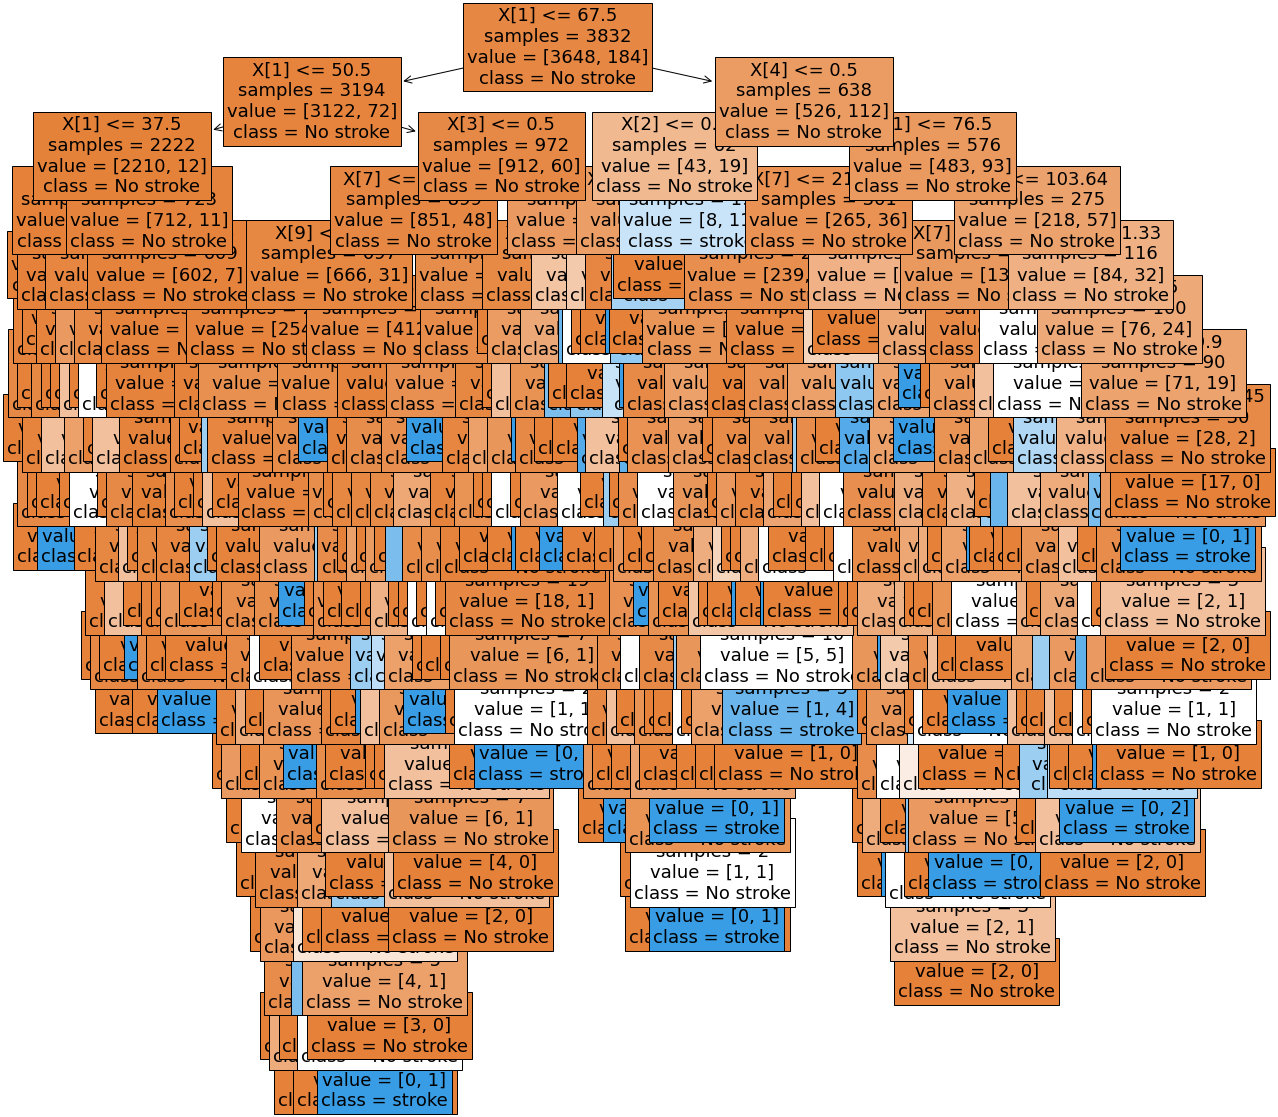

In [193]:
plt.figure(figsize=(20, 20))
plot_tree(
    model,
    class_names=['No stroke', 'stroke'],
    impurity=False,
    filled=True,
    fontsize=18
)
plt.show()

In [194]:
df_test = pd.read_csv('/content/sample_data/stroke.csv')
df_test = preprocess(df_test)
df_test=df_test.drop(columns=['stroke'])

#Evaluate#
Accuracy = Correct Predictions / Total Predictions

In [195]:
inputs = pd.DataFrame(X_test)
prediction_DecisionTreeClassifier = model.predict(
    inputs
)
accuracy_DecisionTreeClassifier = accuracy_score(y_test,prediction_DecisionTreeClassifier)
print(f"Accuracy score of DecisionTreeClassifier = {accuracy_DecisionTreeClassifier}")

precision_DecisionTreeClassifier = precision_score(y_test,prediction_DecisionTreeClassifier,average='weighted')
print(f"Precision score of DecisionTreeClassifier = {precision_DecisionTreeClassifier}")



Accuracy score of DecisionTreeClassifier = 0.917057902973396
Precision score of DecisionTreeClassifier = 0.9145825587605976


Random Forest Classifier

In [196]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

model_rf.fit(
    X_train,
    np.ravel(y_train)
)


RandomForestClassifier()

In [197]:
inputs = pd.DataFrame(X_test)
prediction_RandomForestClassifier = model_rf.predict(
    inputs
)
accuracy_RandomForestClassifier = accuracy_score(y_test,prediction_RandomForestClassifier)
print(f"Accuracy score of RandomForestClassifier = {accuracy_RandomForestClassifier}")

precision_RandomForestClassifier = precision_score(y_test,prediction_RandomForestClassifier,average='weighted')
print(f"Precision score of RandomForestClassifier = {precision_RandomForestClassifier}")


Accuracy score of RandomForestClassifier = 0.9483568075117371
Precision score of RandomForestClassifier = 0.9008275704868732


Extremely Randomized Trees

In [198]:
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTreesClassifier = ExtraTreesClassifier()
model_ExtraTreesClassifier.fit(
    X_train,
    np.ravel(y_train)
)

ExtraTreesClassifier()

In [199]:
inputs = pd.DataFrame(X_test)
prediction_ExtraTreesClassifier = model_ExtraTreesClassifier.predict(
    inputs
)
accuracy_ExtraTreesClassifier = accuracy_score(y_test,prediction_ExtraTreesClassifier)
print(f"Accuracy score of ExtraTreesClassifier = {accuracy_ExtraTreesClassifier}")

precision_ExtraTreesClassifier = precision_score(y_test,prediction_ExtraTreesClassifier,average='weighted')
print(f"Precision score of ExtraTreesClassifier = {precision_ExtraTreesClassifier}")



Accuracy score of ExtraTreesClassifier = 0.9428794992175273
Precision score of ExtraTreesClassifier = 0.9005612854731186


*Summary - Stroke dataset accuracy score*

In [200]:

print(tabulate([["Accuracy",accuracy_DecisionTreeClassifier,accuracy_RandomForestClassifier,accuracy_ExtraTreesClassifier],["Precision",precision_DecisionTreeClassifier,precision_RandomForestClassifier,precision_ExtraTreesClassifier]], headers=["Metric\Model","DecisionTreeClassifier","RandomForestClassifier","ExtraTreesClassifier"], tablefmt="grid"))

+----------------+--------------------------+--------------------------+------------------------+
| Metric\Model   |   DecisionTreeClassifier |   RandomForestClassifier |   ExtraTreesClassifier |
+================+==========================+==========================+========================+
| Accuracy       |                 0.917058 |                 0.948357 |               0.942879 |
+----------------+--------------------------+--------------------------+------------------------+
| Precision      |                 0.914583 |                 0.900828 |               0.900561 |
+----------------+--------------------------+--------------------------+------------------------+


#Cross-validated hyper-parameter optimization for our models# 

In [201]:
# Maximum number of levels in tree
tree_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
tree_max_depth.append(None)

# Number of features to consider at every split
tree_max_features = ['auto', 'sqrt', 'log2']

# Criterion 
tree_criterion = ['gini', 'entropy']

#splitter
tree_splitter = ['best', 'random']

# Minimum number of samples required to split a node
tree_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum samples leaf
tree_min_samples_leaf = [random.randint(1, 100)]


# Create the grid
tree_grid = {'max_depth': tree_max_depth,
               'max_features': tree_max_features,
               'criterion': tree_criterion,
               'min_samples_split': tree_min_samples_split,
               'min_samples_leaf': tree_min_samples_leaf}

In [202]:
# defining our tree object with the hyper parameters discussed above
model_tree = DecisionTreeClassifier()

tree_cv = RandomizedSearchCV(model_tree, tree_grid, cv=5)
tree_cv.fit(
    X_train,
    y_train
)



print("Decision Tree Best Hyperparameters: {}".format(tree_cv.best_params_))

Decision Tree Best Hyperparameters: {'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}


In [203]:
tree_cv_best_params=tree_cv.best_params_
model_tree_Hyperparameters = DecisionTreeClassifier(min_samples_split = tree_cv_best_params['min_samples_split'], min_samples_leaf= tree_cv_best_params['min_samples_leaf'], max_features= tree_cv_best_params['max_features'], max_depth= tree_cv_best_params['max_depth'], criterion= tree_cv_best_params['criterion'])
model_tree_Hyperparameters.fit(X_train,y_train)
print(f"min_samples_split = {tree_cv_best_params['min_samples_split']}, min_samples_leaf= {tree_cv_best_params['min_samples_leaf']}, max_features= {tree_cv_best_params['max_features']}, max_depth= {tree_cv_best_params['max_depth']}, criterion= {tree_cv_best_params['criterion']}")

min_samples_split = 7, min_samples_leaf= 1, max_features= sqrt, max_depth= 5, criterion= gini


In [204]:
inputs = pd.DataFrame(X_test)
prediction_DecisionTreeClassifier_Hyperparameter = model_tree_Hyperparameters.predict(
    inputs
)
accuracy_DecisionTreeClassifier_Hyperparameter = accuracy_score(y_test,prediction_DecisionTreeClassifier_Hyperparameter)
print(f"Accuracy score of DecisionTreeClassifier = {accuracy_DecisionTreeClassifier_Hyperparameter}")


precision_DecisionTreeClassifier_Hyperparameter = precision_score(y_test,prediction_DecisionTreeClassifier_Hyperparameter,average='weighted')
print(f"Precision score of DecisionTreeClassifier = {precision_DecisionTreeClassifier_Hyperparameter}")

Accuracy score of DecisionTreeClassifier = 0.9499217527386542
Precision score of DecisionTreeClassifier = 0.9361477799257417


#Random Forest#

In [205]:
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion 
rf_criterion = ['gini', 'entropy']

#splitter
rf_splitter = ['best', 'random']

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
                'bootstrap': rf_bootstrap}

In [206]:
model_rf_Hyperparameter = RandomForestClassifier()

rf_cv = RandomizedSearchCV(model_rf_Hyperparameter, rf_grid, cv=5)
rf_cv.fit(
    X_train,
    np.ravel(y_train)
)


# tree_cv.get_params()
print("RandomForestClassifiers Best Hyperparameters : {}".format(rf_cv.best_params_))

RandomForestClassifiers Best Hyperparameters : {'min_samples_split': 4, 'min_impurity_decrease': 0.1, 'max_features': 'auto', 'max_depth': 15, 'criterion': 'entropy', 'bootstrap': True}


In [207]:
rf_best_params = rf_cv.best_params_
model_rf_Hyperparameter = RandomForestClassifier(min_samples_split = rf_best_params['min_samples_split'], min_impurity_decrease = rf_best_params['min_impurity_decrease'], max_features = rf_best_params['max_features'], max_depth = rf_best_params['max_depth'], criterion = rf_best_params['criterion'], bootstrap = rf_best_params['bootstrap'])
model_rf_Hyperparameter.fit(X_train,np.ravel(y_train))

RandomForestClassifier(criterion='entropy', max_depth=15,
                       min_impurity_decrease=0.1, min_samples_split=4)

In [208]:

inputs = pd.DataFrame(X_test)
prediction_rf_Hyperparameter = model_rf_Hyperparameter.predict(
    inputs
)
accuracy_rf_Hyperparameter = accuracy_score(y_test,prediction_rf_Hyperparameter)
print(f"Accuracy score of RandomForestClassifier = {accuracy_rf_Hyperparameter}")

precision_rf_Hyperparameter = precision_score(y_test,prediction_rf_Hyperparameter,average='weighted')
print(f"Precision score of RandomForestClassifier = {precision_rf_Hyperparameter}")

Accuracy score of RandomForestClassifier = 0.9491392801251957
Precision score of RandomForestClassifier = 0.9008653730765747


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Extra Trees Classifier#

In [209]:
# Maximum number of levels in tree
ex_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
ex_max_depth.append(None)

# Number of features to consider at every split
ex_max_features = ['sqrt', 'log2',None]

# Criterion 
ex_criterion = ['gini', 'entropy']

# Minimum number of samples required to split a node
ex_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
ex_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
ex_bootstrap = [True, False]

# Create the grid
ex_grid = {'max_depth': ex_max_depth,
               'max_features': ex_max_features,
               'criterion': ex_criterion,
               'min_samples_split': ex_min_samples_split,
               'min_impurity_decrease': ex_min_impurity_decrease,
                'bootstrap': ex_bootstrap}

In [210]:
model_ex_Hyperparameter = ExtraTreesClassifier()

ex_cv = RandomizedSearchCV(model_ex_Hyperparameter, ex_grid, cv=5)
ex_cv.fit(
    X_train,
    np.ravel(y_train)
)


print("Extra Trees Classifier Best Hyperparameters: {}".format(ex_cv.best_params_))

Extra Trees Classifier Best Hyperparameters: {'min_samples_split': 5, 'min_impurity_decrease': 0.05, 'max_features': 'sqrt', 'max_depth': 45, 'criterion': 'entropy', 'bootstrap': False}


In [211]:
ex_best_params = ex_cv.best_params_
model_ex_Hyperparameter = ExtraTreesClassifier(min_samples_split= ex_best_params['min_samples_split'], min_impurity_decrease = ex_best_params['min_impurity_decrease'], max_features=ex_best_params['max_features'], max_depth =ex_best_params['max_depth'], criterion= ex_best_params['criterion'], bootstrap= ['bootstrap'])

model_ex_Hyperparameter.fit(
    X_train,
    np.ravel(y_train)
)

ExtraTreesClassifier(bootstrap=['bootstrap'], criterion='entropy', max_depth=45,
                     max_features='sqrt', min_impurity_decrease=0.05,
                     min_samples_split=5)

In [212]:
inputs = pd.DataFrame(X_test)
prediction_ex_Hyperparameter = model_ex_Hyperparameter.predict(
    inputs
)
accuracy_ex_Hyperparameter = accuracy_score(y_test,prediction_ex_Hyperparameter)
print(f"Accuracy score of ExtraTreesClassifier = {accuracy_ex_Hyperparameter}")

precision_ex_Hyperparameter = precision_score(y_test,prediction_ex_Hyperparameter,average='weighted')
print(f"Precision score of ExtraTreesClassifier = {precision_ex_Hyperparameter}")

Accuracy score of ExtraTreesClassifier = 0.9491392801251957
Precision score of ExtraTreesClassifier = 0.9008653730765747


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Summary - Stroke dataset#

In [213]:
print("Decision Tree Best Hyperparameters:\n {}\n".format(tree_cv.best_params_))
print("RandomForestClassifiers Best Hyperparameters :\n {}\n".format(rf_cv.best_params_))
print("Extra Trees Classifier Best Hyperparameters:]\n {}\n".format(ex_cv.best_params_))
print("Accuracy using the optimal hyper-parameters we found :")
print(tabulate([["Accuracy",accuracy_DecisionTreeClassifier,accuracy_RandomForestClassifier,accuracy_ExtraTreesClassifier],["Accuracy using the\noptimalhyper-parameters\nwe found",accuracy_DecisionTreeClassifier_Hyperparameter,accuracy_rf_Hyperparameter,accuracy_ex_Hyperparameter],["Precision",precision_DecisionTreeClassifier,precision_RandomForestClassifier,precision_ExtraTreesClassifier],["Precision  using the\noptimalhyper-parameters\nwe found",precision_DecisionTreeClassifier_Hyperparameter,precision_rf_Hyperparameter,precision_ex_Hyperparameter]], headers=["Model","DecisionTreeClassifier","RandomForestClassifier","ExtraTreesClassifier"], tablefmt="grid"))

Decision Tree Best Hyperparameters:
 {'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}

RandomForestClassifiers Best Hyperparameters :
 {'min_samples_split': 4, 'min_impurity_decrease': 0.1, 'max_features': 'auto', 'max_depth': 15, 'criterion': 'entropy', 'bootstrap': True}

Extra Trees Classifier Best Hyperparameters:]
 {'min_samples_split': 5, 'min_impurity_decrease': 0.05, 'max_features': 'sqrt', 'max_depth': 45, 'criterion': 'entropy', 'bootstrap': False}

Accuracy using the optimal hyper-parameters we found :
+-------------------------+--------------------------+--------------------------+------------------------+
| Model                   |   DecisionTreeClassifier |   RandomForestClassifier |   ExtraTreesClassifier |
+=========================+==========================+==========================+========================+
| Accuracy                |                 0.917058 |                 0.948357 |               0.94